### This markdown scirpt is for testing the text of this programe

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import os
import re
import random
import time
import traceback
from IPython.display import Image
from text import cmudict, text_to_sequence
import pickle
from sklearn.manifold import TSNE
import tensorflow as tf

In [3]:
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

In [5]:
text_emb=tf.contrib.framework.load_variable('/home/gyzhang/projects/gst-tacotron/logs-tacotron/cusent/model.ckpt-296000','model/inference/text_embedding')
X = np.array(text_emb)
X_embedded = TSNE(n_components=2).fit_transform(X)

In [10]:
_pad        = '_'
_eos        = '~'
pkl_file = open('./text/final_set', 'rb')
final_set = pickle.load(pkl_file)
pkl_file.close()
pkl_file = open('./text/initial_set', 'rb')
initial_set = pickle.load(pkl_file)
pkl_file.close()

symbols = list(initial_set)+list(final_set)
symbols = [re.split('\_',symbol)[1] for symbol in symbols]
symbols=[_pad,_eos] +symbols

(0.0, 0.8)

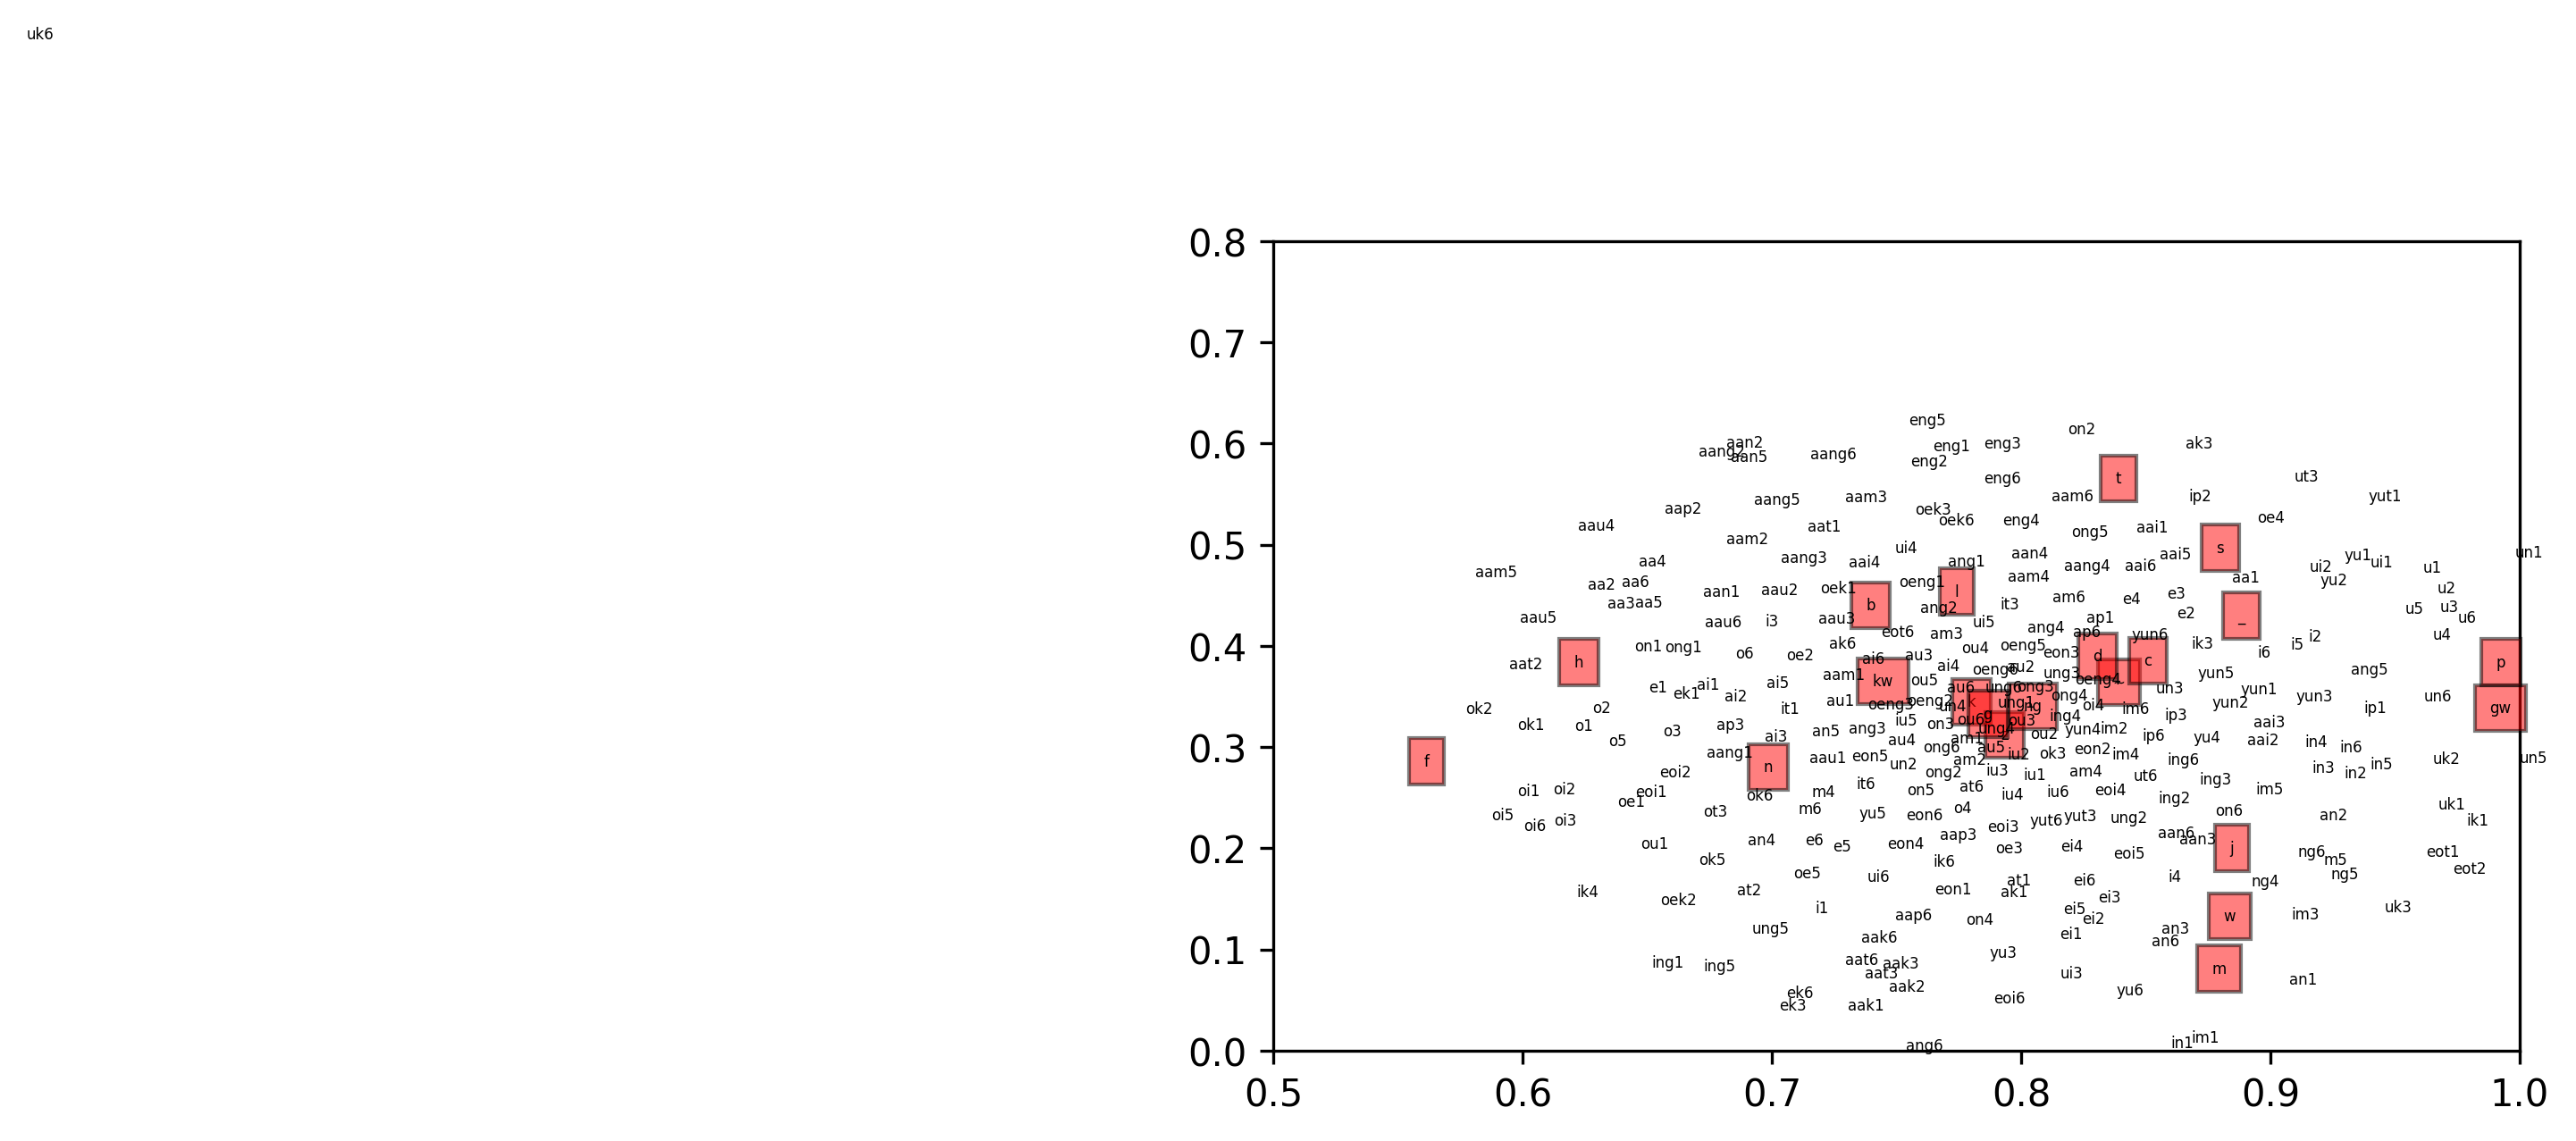

In [22]:
x_min, x_max = X_embedded.min(0), X_embedded.max(0)
X_norm = (X_embedded - x_min) / (x_max - x_min)  # 归一化

for i in range(X_norm.shape[0]):
    if i<=20:
        plt.text(X_norm[i, 0], X_norm[i, 1],s=symbols[i],bbox=dict(facecolor='red',alpha=0.5),fontsize=4)
    else:
        plt.text(X_norm[i, 0], X_norm[i, 1],s=symbols[i],fontsize=4)
#     plt.text(X_norm[i, 0], X_norm[i, 1],s=symbols[i],fontsize=4)
plt.xlim(0.5,1.0)
plt.ylim(0.0,0.8)